# EverUp Micro-Credential Data Analytics Datathon Team 2
## Challenge Scenario 
COVID-19 impact for the year – quarterly analysis: 
- Pick New York state for your analysis 
- Find number of new cases and deaths reported in each month 
- Which month/ week was the deadliest  
- Do you see any trend in data when it comes to recovery such as U shape 
recovery 

Discover patterns and trends – Covid tests and Variants 
- Find Covid test trends  
- Find Covid variant trends 

Perform stock market data analysis 
- Explore your favorite stocks 
- How your favorite stocks performed during pandemic period 
- Do you notice any trend for your stocks

Try to put your findings together and draw at least 3 logical conclusions. 

Team Member:
1. Briana Pinales
2. JianHui (Jake) Li
3. Min Shin Khant

## COVID-19 impact for the year – quarterly analysis

### Environment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

### Data Collection

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

ny_df = df[df['state']=='New York']

## Data Cleaning and Wangling 

In [ ]:
ny_df['year'] = pd.DatetimeIndex(ny_df['date']).year
ny_df['month'] = pd.DatetimeIndex(ny_df['date']).month

#cases
newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)

#death
new_death = []
previuos_death = 0
for index, row in ny_df.iterrows():
  current_death = row['deaths']
  newdeath_count = current_death - previuos_death
  previuos_death = current_death
  new_death.append(newdeath_count)

ny_df['new_cases'] = newcase
ny_df['new_death'] = new_death

newnydf = ny_df.drop(['date', 'fips', 'cases', 'deaths'], axis = 1)
ny_df_2021 = newnydf[newnydf['year'] == 2021]


ny_monthly_cases = ny_df_2021.groupby('month')['new_cases'].sum()
ny_monthly_deaths = ny_df_2021.groupby('month')['new_death'].sum()
nys_df_2021 = pd.concat([ny_monthly_cases, ny_monthly_deaths], axis=1)
nys_df_2021.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Visualization of the Data

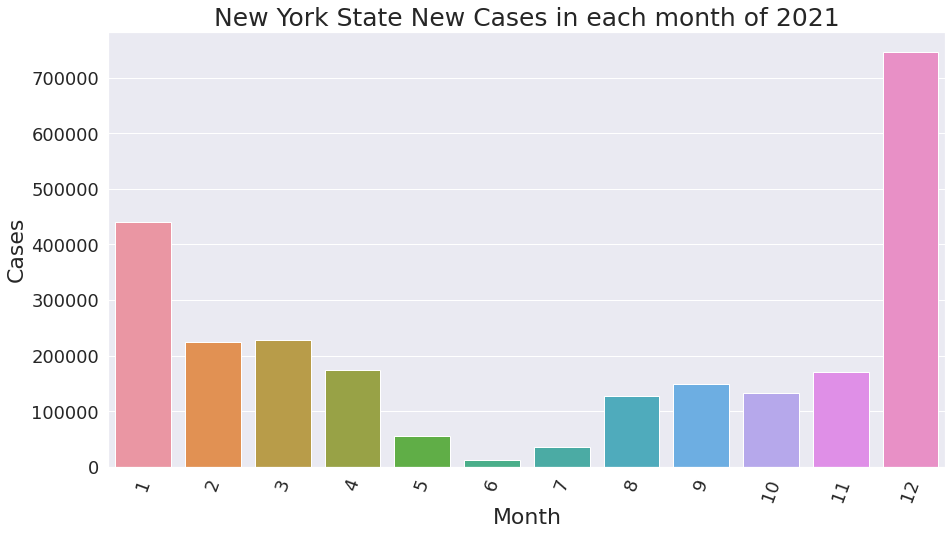

In [ ]:
sns.barplot(x="month", y = "new_cases", data=nys_df_2021)
plt.title("New York State New Cases in each month of 2021", fontsize=25)
plt.xticks(fontsize= 18, rotation=70)
plt.xlabel("Month", fontsize=22)
plt.yticks(fontsize=18) 
plt.ylabel("Cases", fontsize=22)
plt.ticklabel_format(style='plain', axis='y')

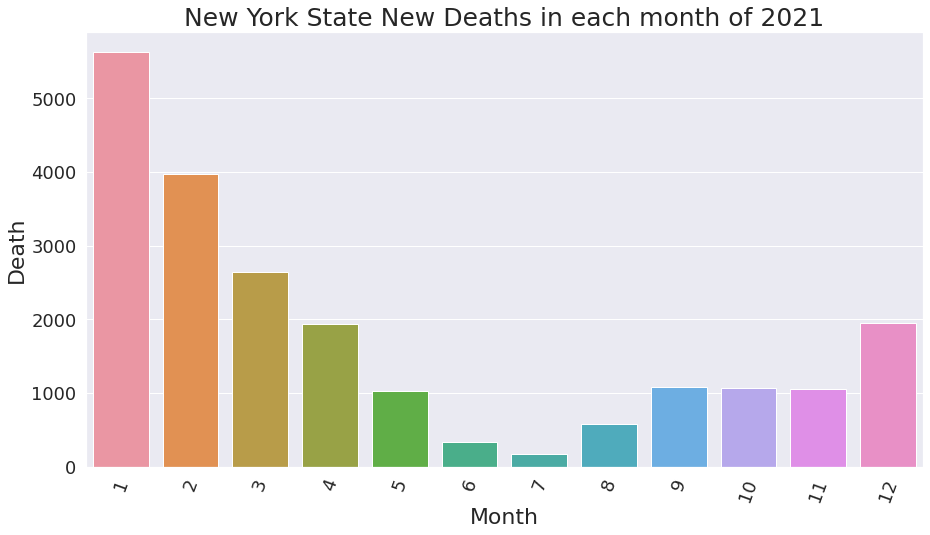

In [ ]:
sns.barplot(x="month", y = "new_death", data=nys_df_2021)
plt.title("New York State New Deaths in each month of 2021", fontsize=25)
plt.xticks(fontsize= 18, rotation=70)
plt.xlabel("Month", fontsize=22)
plt.yticks(fontsize=18) 
plt.ylabel("Death", fontsize=22)
plt.ticklabel_format(style='plain', axis='y')

### According to the above graph, January is the deathest month of 2021. 

## Discover patterns and trends – Covid tests and Variants

### Environment Setup

In [ ]:
COVID_TEST_DF = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/tests.csv')

In [ ]:
COVID_TEST_DF.drop(['TOTAL_TESTS_7DAYS_AVG','PERCENT_POSITIVE_7DAYS_AVG','TOTAL_ANTIGEN_TESTS','TOTAL_ANTIGEN_TESTS_7DAYS_AVG','INCOMPLETE','POSITIVE_TESTS_7DAYS_AVG'],axis=1, inplace = True )

In [ ]:
COVID_TEST_DF['year'] = pd.DatetimeIndex(COVID_TEST_DF['DATE']).year
COVID_TEST_DF['month'] = pd.DatetimeIndex(COVID_TEST_DF['DATE']).month

In [ ]:
COVID_TEST_df_2021 = COVID_TEST_DF[COVID_TEST_DF['year'] == 2021]

In [ ]:
CURRERNT_TEST = []
previuos_TEST = 0
for index, row in COVID_TEST_df_2021.iterrows():
  TOTAL_TESTS = row['TOTAL_TESTS']
  TOTAL_TEST_count = TOTAL_TESTS - previuos_TEST
  previuos_TEST = TOTAL_TESTS
  CURRERNT_TEST.append(TOTAL_TEST_count)

In [ ]:
current_positive_TEST = []
previous_positive_TEST = 0
for index, row in COVID_TEST_df_2021.iterrows():
  TOTAL_positive_TESTS = row['POSITIVE_TESTS']
  TOTAL_positive_TEST_count = TOTAL_positive_TESTS - previous_positive_TEST
  previous_positive_TEST = TOTAL_positive_TESTS
  current_positive_TEST.append(TOTAL_positive_TEST_count)

In [ ]:
COVID_TEST_df_2021['NEW_TOTAL_TESTS'] = CURRERNT_TEST
COVID_TEST_df_2021['NEW_POSITIVE_TESTS'] = current_positive_TEST

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ny_monthly_total_test = COVID_TEST_df_2021.groupby('month')['NEW_TOTAL_TESTS'].sum()
ny_monthly_total_test = COVID_TEST_df_2021.groupby('month')['NEW_TOTAL_TESTS'].sum()
ny_monthly_positive_test = COVID_TEST_df_2021.groupby('month')['NEW_POSITIVE_TESTS'].sum()
nys_test_df_2021 = pd.concat([ny_monthly_total_test, ny_monthly_positive_test], axis=1)
nys_test_df_2021.reset_index(inplace=True)

nys_test_df_2021

,month,NEW_TOTAL_TESTS,NEW_POSITIVE_TESTS
0,1,37185,3990
1,2,-9773,-1237
2,3,45900,1564
3,4,-8761,-2859
4,5,-43969,-1273
5,6,11141,78
6,7,-6622,794
7,8,41023,978
8,9,20465,-579
9,10,-61804,-899


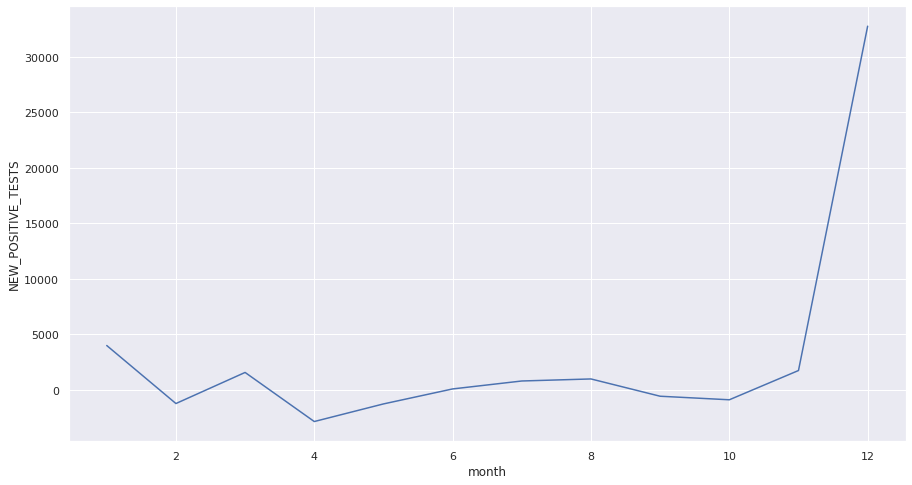

In [ ]:
sns.lineplot(x="month", y = "NEW_POSITIVE_TESTS", data=nys_test_df_2021)

In [ ]:
varients= pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/variants/variant-epi-data.csv')

In [ ]:
varients=varients.rename(columns={'B.1.1.529 count':'Omicron count','B.1.1.529 percent':'Omicron percentage','B.1.617.2 count':'Delta count','B.1.617.2 percent':'Delta percentage','B.1.1.7 count':'Alpha count','B.1.1.7 percent':'Alpha percentage'})
varients=varients.rename(columns={'B.1.351 count':'Beta count','B.1.351 percent':'Beta percentage','B.1.427 count':'Epsilion count','B.1.427 percent':'Epsilion percentage'})
varients=varients.rename(columns={'B.1.526 no E484K count':'Iota count','B.1.526 no E484K percent':'Iota percentage'})
varients=varients.rename(columns={'P.1 count':'Gamma count','P.1 percent':'Gamma percentage','B.1.429 count':'2 Epsilon count','B.1.429 percent':'2 Epsilon percentage'})
varients.drop(['incomplete'], axis =1, inplace= True)

In [ ]:
varients.drop([52,53,54], axis=0, inplace=True)
varients['month'] = pd.DatetimeIndex(varients['Sequence week']).month


Text(0.5, 1.0, 'Percentage of Iota varient throughout 2021')

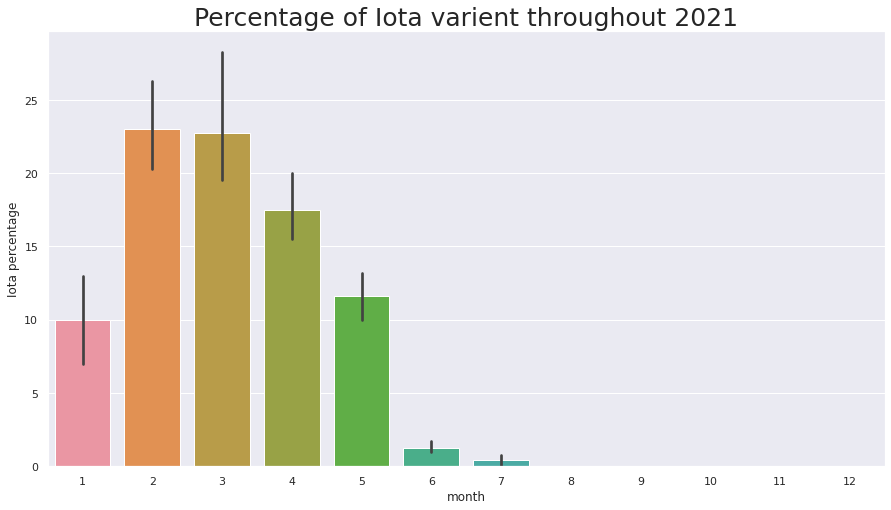

In [ ]:
sns.barplot(x="month", y = "Iota percentage",data=varients)
plt.title("Percentage of Iota varient throughout 2021", fontsize=25)

Text(0.5, 1.0, 'Percentage of Gamma varient throughout 2021')

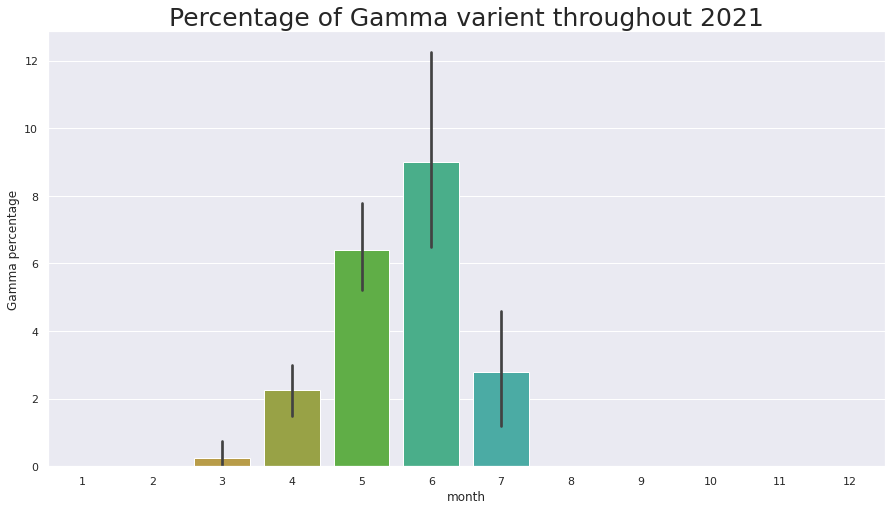

In [ ]:
sns.barplot(x="month", y = "Gamma percentage",data=varients)
plt.title("Percentage of Gamma varient throughout 2021", fontsize=25)

Text(0.5, 1.0, 'Percentage of Epsilon varient B.1.429 varient throughout 2021')

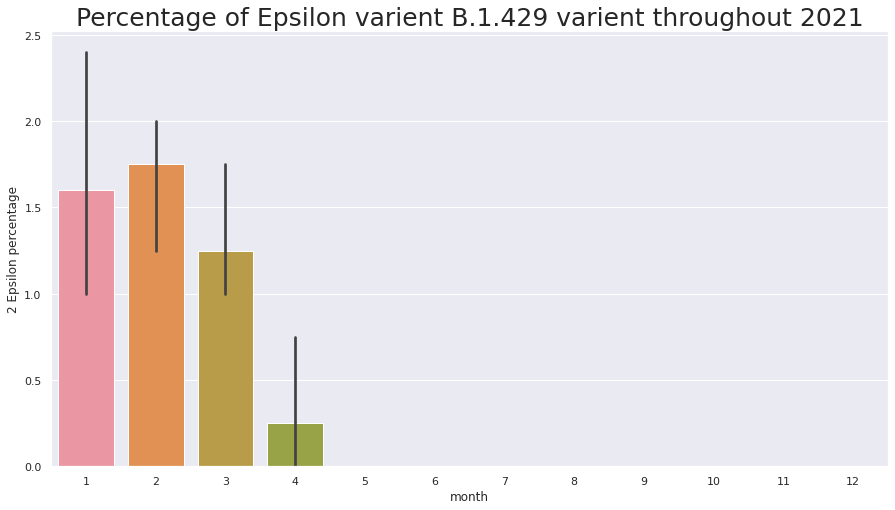

In [ ]:
sns.barplot(x="month", y = "2 Epsilon percentage",data=varients)
plt.title("Percentage of Epsilon varient B.1.429 varient throughout 2021", fontsize=25)

Text(0.5, 1.0, 'Percentage of Epsilon varient throughout 2021')

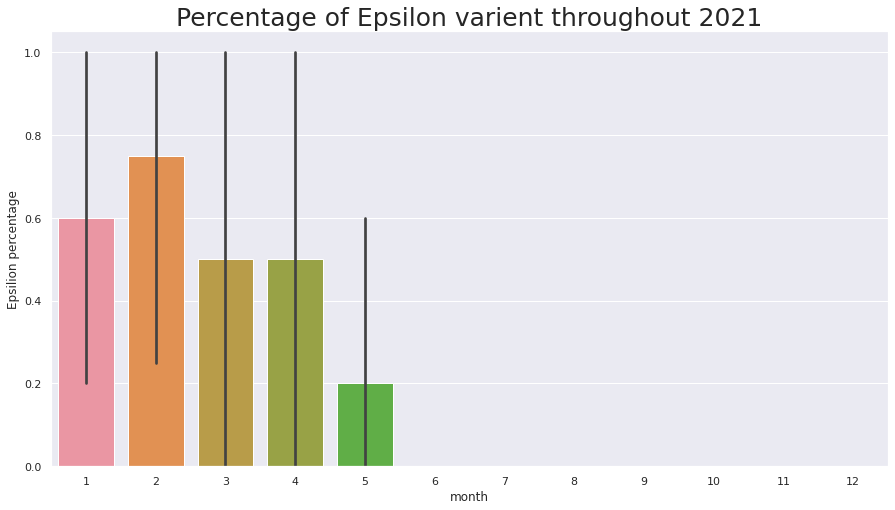

In [ ]:
sns.barplot(x="month", y = "Epsilion percentage",data=varients)
plt.title("Percentage of Epsilon varient throughout 2021", fontsize=25)

Text(0.5, 1.0, 'Percentage of B.1.621 varient throughout 2021')

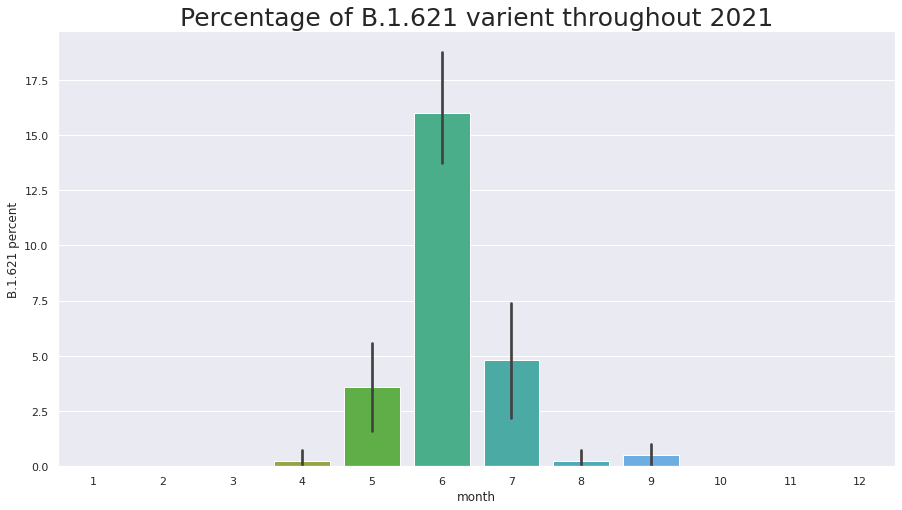

In [ ]:
sns.barplot(x="month", y = "B.1.621 percent",data=varients)
plt.title("Percentage of B.1.621 varient throughout 2021", fontsize=25)

Text(0.5, 1.0, 'Percentage of Delta varient throughout 2021')

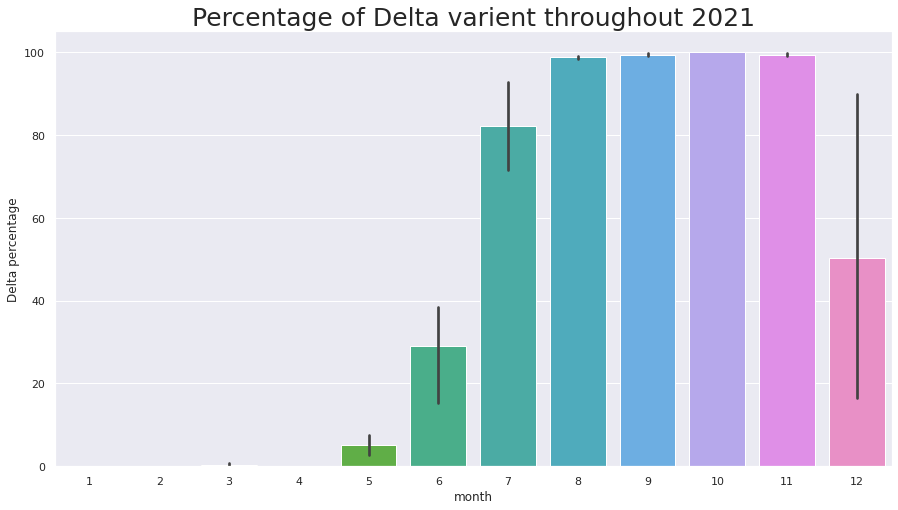

In [ ]:
sns.barplot(x="month", y = "Delta percentage",data=varients)
plt.title("Percentage of Delta varient throughout 2021", fontsize=25)

Text(0.5, 1.0, 'Percentage of Omicron varient throughout 2021')

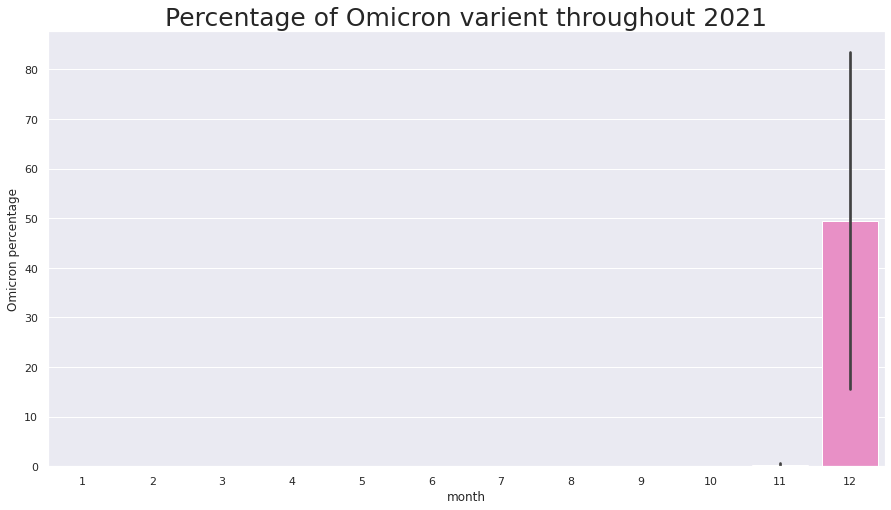

In [ ]:
sns.barplot(x="month", y = "Omicron percentage",data=varients)
plt.title("Percentage of Omicron varient throughout 2021", fontsize=25)

## Perform stock market data analysis

### Environment Setup

In [ ]:
!pip install pandas-datareader
!pip install yfinance

In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import seaborn as sns

In [ ]:
tsla_df = yf.download('TSLA', start='2021-01-01', end='2021-12-31', progress=False)
tsla_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500
...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000


In [ ]:
pfe_df = yf.download('PFE', start='2021-01-01', end='2021-12-31', progress=False)
pfe_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,36.869999,36.939999,36.270000,36.810001,35.156662,33565700
2021-01-05,36.720001,37.369999,36.599998,37.189999,35.519588,29909400
2021-01-06,36.830002,37.480000,36.770000,36.869999,35.213963,34962500
2021-01-07,37.040001,37.150002,36.669998,37.060001,35.395432,27809500
2021-01-08,37.160000,37.529999,36.900002,37.130001,35.462292,33462400
...,...,...,...,...,...,...
2021-12-23,59.820000,60.080002,58.310001,58.709999,58.266987,39203200
2021-12-27,58.849998,59.380001,58.230000,59.200001,58.753292,27362600
2021-12-28,59.049999,59.450001,57.080002,58.009998,57.572269,36901700


Text(0.5, 1.0, 'TSLA Stock Price From 2021/01/01 to 2021/12/31')

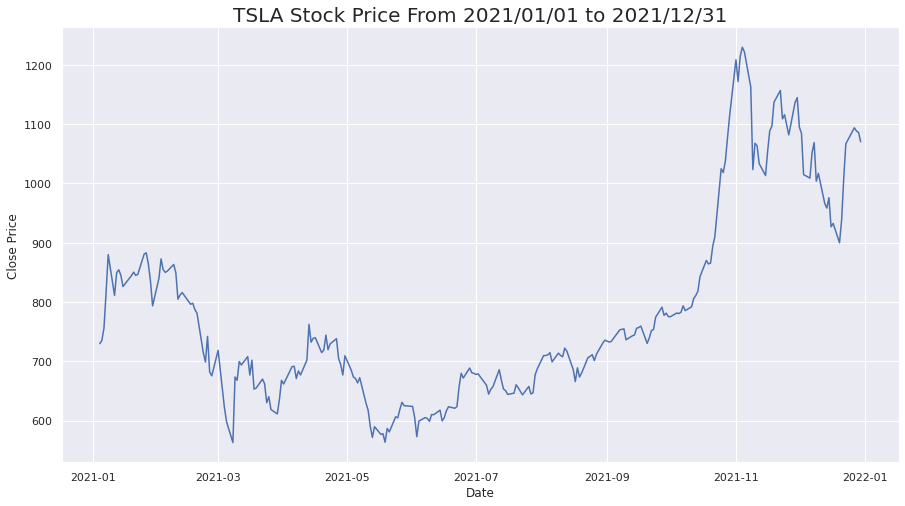

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
tsla_chart = sns.lineplot(x = "Date", y = "Close", data = tsla_df)
tsla_chart.set_ylabel('Close Price')
tsla_chart.set_title('TSLA Stock Price From 2021/01/01 to 2021/12/31', fontsize = 20)

Text(0.5, 1.0, 'PFE Stock Price From 2021/01/01 to 2021/12/31')

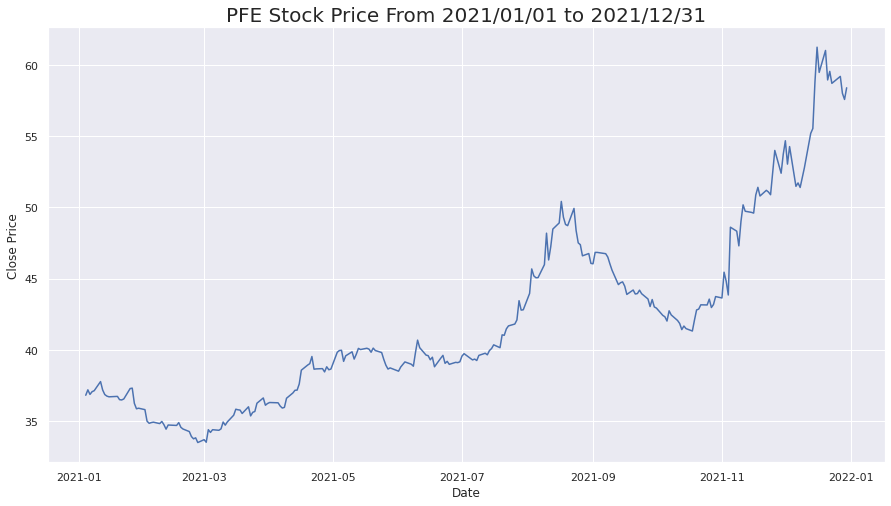

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
pfe_chart = sns.lineplot(x = "Date", y = "Close", data = pfe_df)
pfe_chart.set_ylabel('Close Price')
pfe_chart.set_title('PFE Stock Price From 2021/01/01 to 2021/12/31', fontsize = 20)

Conclusions
1. The Delta variant is the least deadilest as the deaths were at their lowest when the Delta varient was strong. 
2. Delta variant is the most proflic variant of its time as it was 100% of the positive tests in October, as well as the varient whose reign was the longest for about 6 months.
3. Even throughout the Delta Variants reign, the amount of positive tests it created compared to the Omicron pale in comparison.